In [1]:
import pandas
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Generating Non-Linear Data

In [2]:
def generate_spirals():
    N = 400 # number of points per class
    D = 3 # dimensionality
    K = 3 # number of classes
    Z_max = 5 # max height
    data = np.zeros((N*K,D)) # data matrix (each row = single example)
    label = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        z = np.linspace(Z_max,0.0,N) # radius
        data[ix] = np.c_[r*np.sin(t), r*np.cos(t), z]
        label[ix] = j      # so that classification is from 1 onwards.
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=label, s=40)
    
    ax.legend()
    
    plt.show()
    return [data, label]

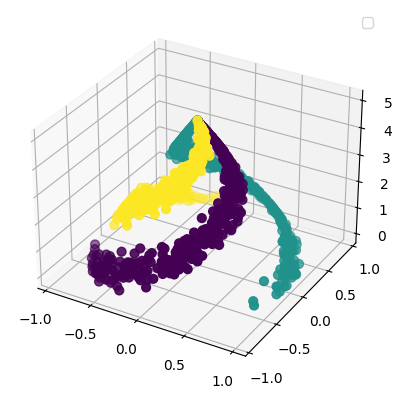

In [3]:
[dataset, labels] = generate_spirals()

## Saving Dataset for MATLAB Classification

In [4]:
# print(dataset.shape)
# print(labels.shape)
# combine data to be exported for MATLAB analysis
# Stack the datasets horizontally (column-wise)
labelled_dataset = np.column_stack((labels.reshape(-1, 1), dataset))
#print(labelled_dataset.shape)

In [5]:
# save data to implement Supervised Learning Classification Techniques in MATLAB
savemat('labelledDataset.mat', {'variable_name': labelled_dataset})

## Classification using Keras Neural Network

In [6]:
class MultiClassNN:
    def __init__(self, input_dim, num_classes, hidden_units=(64, 32), activation='relu', optimizer='adam'):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_units = hidden_units
        self.activation = activation
        self.optimizer = optimizer

        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units[0], input_dim=self.input_dim, activation=self.activation))
        for units in self.hidden_units[1:]:
            model.add(Dense(units, activation=self.activation))
        model.add(Dense(self.num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])
        return model

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy


In [7]:
# Features and labels
X = dataset
y = labels
input_dim = X.shape[1]
num_classes = len(np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Initialize the neural network classifier
Classifier = MultiClassNN(input_dim, num_classes)

In [9]:
epochs = 30

# Train the Classification NN Model
print("Training the MultiClass Classification NN Model")
progress = tqdm(range(epochs))
accuracyRecords = np.zeros(epochs)

y_categorical = to_categorical(y_train, num_classes=Classifier.num_classes)

for epoch in progress:
    Classifier.model.fit(X_train, y_categorical, epochs=1, verbose = 0)

# Evaluate the classifier
print("\nEvaluting Classification Model with Test Data")
accuracy = Classifier.evaluate(X_test, y_test)
print("Result after training is completed")
print(f"Accuracy: {accuracy}")

Training the MultiClass Classification NN Model


100%|██████████| 30/30 [00:03<00:00,  7.91it/s]


Evaluting Classification Model with Test Data
2/2 [==============================] - 0s 3ms/step
Result after training is completed
Accuracy: 1.0
